In [1]:
import os
import torch
from torch import Tensor
import numpy as np

from development.nn import development_layer
from development.so import so
from matplotlib import pyplot as plt

os.chdir(os.path.join(os.getcwd(), ".."))
os.getcwd()
torch.cuda.is_available()

False

In [2]:
def generate_BM_paths(N: int, delta: float, rho: float, t: float = 1) -> np.ndarray:
    """
    Return N samples of 2D brownian motion with step-size delta and sample correlation rho
    """
    k = int(np.floor(t / delta))
    sigma = np.sqrt(delta)
    x = np.repeat(np.random.normal(scale=sigma, size=(1, k, 2)), N, axis=0)
    y = np.random.normal(scale=sigma, size=(N, k, 2))
    z = rho**2 * x + (1 - rho**2) * y
    z = np.cumsum(z, axis=1)
    z = np.concatenate([np.zeros((N, 1, 2)), z], axis=1)
    return z


def generate_BM_paths_torch(
    N: int, delta: float, rho: float, t: float = 1, device: str = "cuda"
) -> Tensor:
    """
    Return N samples of 2D brownian motion with step-size delta and sample correlation rho
    """
    k = int(np.floor(t / delta))
    sigma = np.sqrt(delta)
    x = torch.repeat(torch.random.normal(scale=sigma, size=(1, k, 2)), N, axis=0)
    y = torch.random.normal(scale=sigma, size=(N, k, 2))
    z = rho**2 * x + (1 - rho**2) * y
    z = torch.cumsum(z, axis=1)
    z = torch.concatenate([torch.zeros((N, 1, 2)), z], axis=1)
    return z

## Plot Levy area

In [81]:
N = 1
delta = 1e-3
rho = 0.9
x = generate_BM_paths(N, delta, rho, t=1.0)
x[0, :] += np.repeat(np.array([np.linspace(0, 2.0, len(x[0]))]).T, 2, axis=1)
x.shape

(1, 1001, 2)

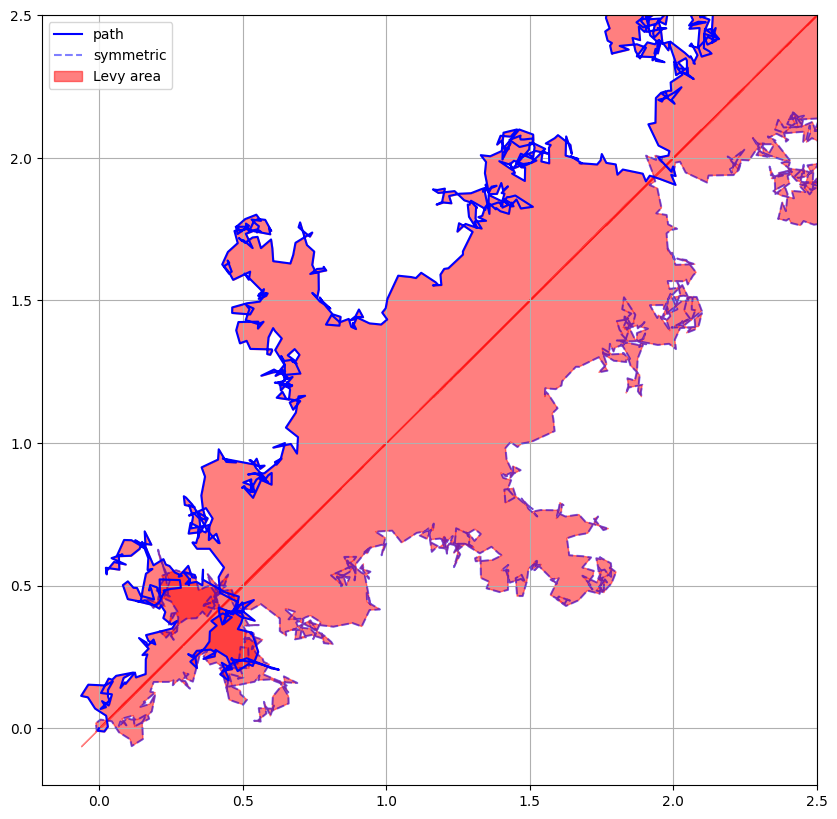

In [91]:
_, ax = plt.subplots(figsize=(10, 10))
ax.plot(x[0, :, 1], x[0, :, 0], c="b", label="path")
ax.plot(x[0, :, 0], x[0, :, 1], c="b", linestyle="--", alpha=0.5, label="symmetric")
m = np.min([np.max(x[0, :, 0]), np.max(x[0, :, 1])])
ax.fill_between(
    x=x[0, :, 0], y1=x[0, :, 0], y2=x[0, :, 1], color="red", alpha=0.5, label="Levy area"
)
ax.fill_between(
    x=x[0, :, 1],
    y1=np.clip(x[0, :, 1], -m, m),
    y2=np.clip(x[0, :, 0], -m, m),
    color="red",
    alpha=0.5,
)
ax.legend()
ax.set_xlim(-0.2, 2.5)
ax.set_ylim(-0.2, 2.5)
ax.grid()

## Visualise unit sphere of Heisenberg group

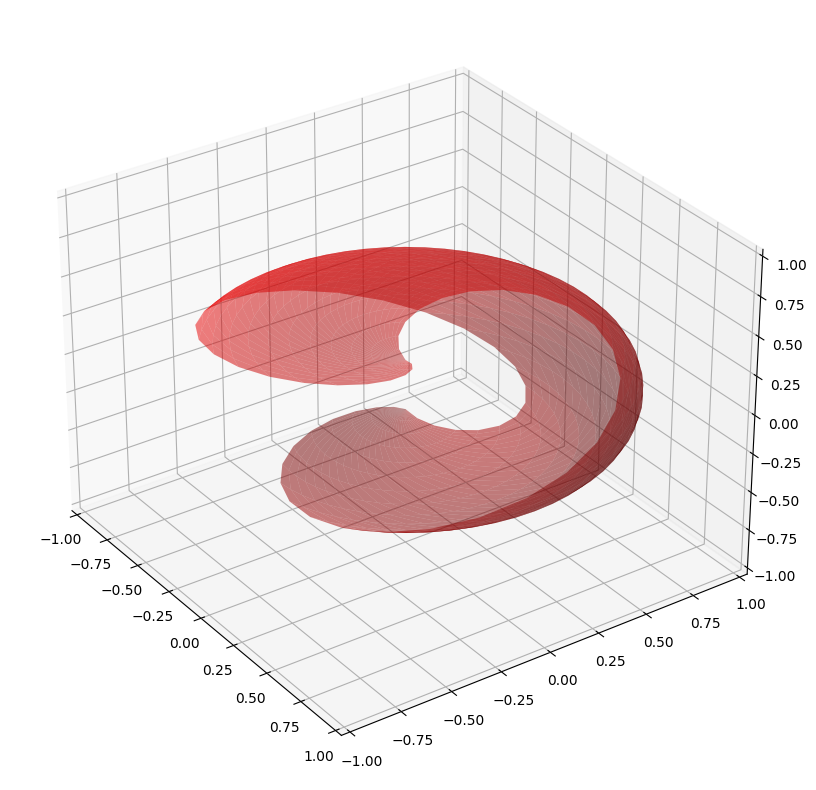

In [3]:
# Generating Torus Mesh
u = np.linspace(0, np.pi, 32)
v = np.linspace(-2 * np.pi, 2 * np.pi, 32)

u, v = np.meshgrid(u, v)
X = (np.cos(u) * np.sin(v) - np.sin(u) * (1 - np.cos(v))) / v
Y = (np.sin(u) * np.sin(v) + np.cos(u) * (1.0 - np.cos(v))) / v
Z = (v - np.sin(v)) / v**2

# Visualizing the mesh
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection="3d")
ax.view_init(elev=30, azim=-35)
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
ax.plot_surface(X, Y, Z, color="r", rstride=1, cstride=1, alpha=0.5)
plt.show()

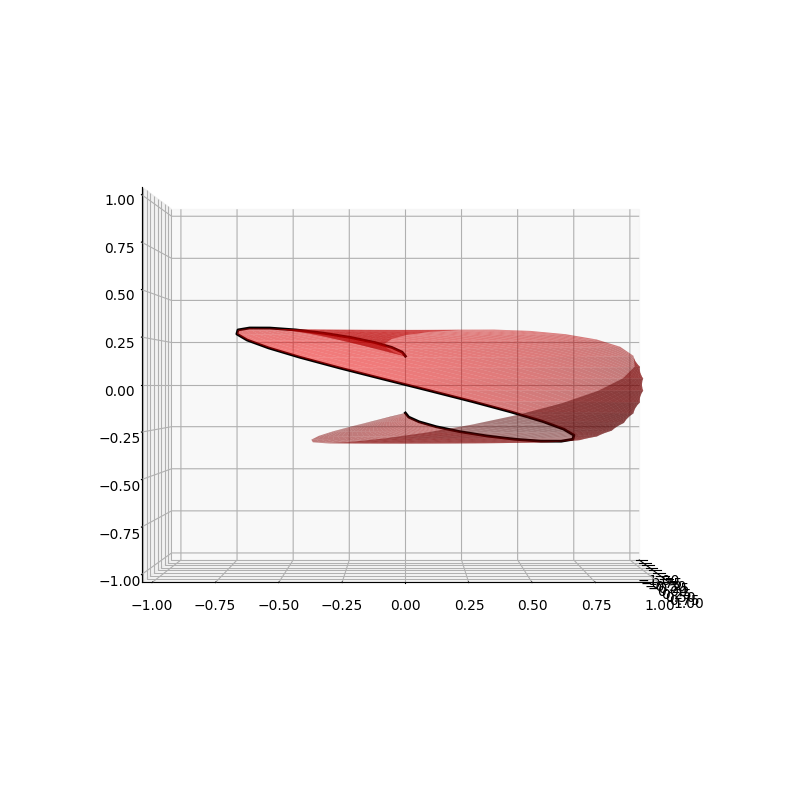

In [4]:
# Generating Torus Mesh
u = np.linspace(1, np.pi, 32)
v = np.linspace(-2 * np.pi, 2 * np.pi, 32)

U, V = np.meshgrid(u, v)
X = (np.cos(U) * np.sin(V) - np.sin(U) * (1 - np.cos(V))) / V
Y = (np.sin(U) * np.sin(V) + np.cos(U) * (1.0 - np.cos(V))) / V
Z = (V - np.sin(V)) / V**2

# Visualizing the mesh
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")
ax.view_init(elev=0, azim=0)
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)

u = np.pi
x = (np.cos(u) * np.sin(v) - np.sin(u) * (1 - np.cos(v))) / v
y = (np.sin(u) * np.sin(v) + np.cos(u) * (1.0 - np.cos(v))) / v
z = (v - np.sin(v)) / v**2

ax.plot_surface(X, Y, Z, color="red", rstride=1, cstride=1, alpha=0.5)
ax.plot(x, y, z, color="black", linewidth=2)


plt.show()

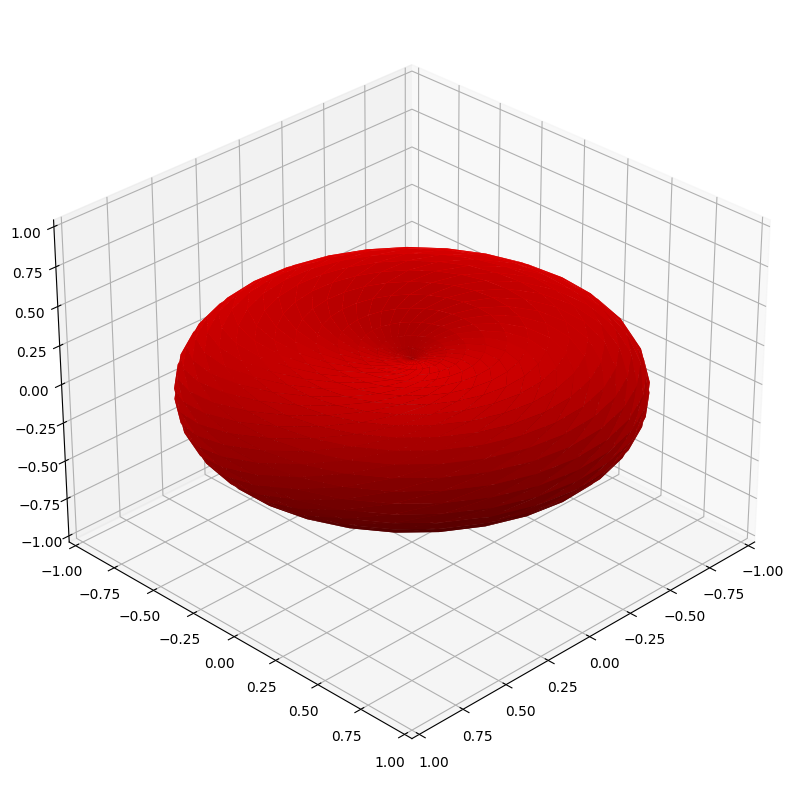

In [5]:
# Generating Torus Mesh
u = np.linspace(0, 2 * np.pi, 32)
v = np.linspace(-2 * np.pi, 2 * np.pi, 32)

u, v = np.meshgrid(u, v)
X = (np.cos(u) * np.sin(v) - np.sin(u) * (1 - np.cos(v))) / v
Y = (np.sin(u) * np.sin(v) + np.cos(u) * (1.0 - np.cos(v))) / v
Z = (v - np.sin(v)) / v**2
# Visualizing the mesh
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection="3d")
ax.view_init(
    elev=30,
    azim=45,
)
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
ax.plot_surface(X, Y, Z, color="r", rstride=1, cstride=1)
plt.show()

## Visualise the development layer of BM

In [5]:
N = 3
delta = 1e-3
rho = 0.4

x = generate_BM_paths(N, delta, rho)

In [6]:
dev_layer = development_layer(
    input_size=2, hidden_size=10, channels=1, param=so, complexification=False, return_sequence=True
)

In [7]:
X = torch.Tensor(x)

In [8]:
Y = dev_layer(X)
Y.shape

torch.Size([3, 1001, 1, 10, 10])

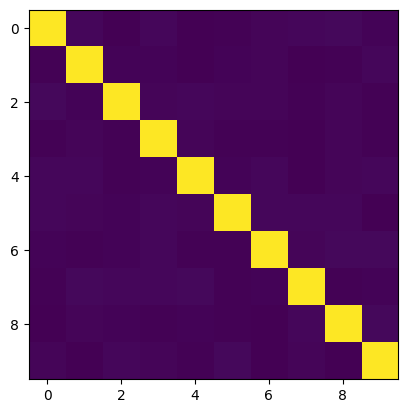

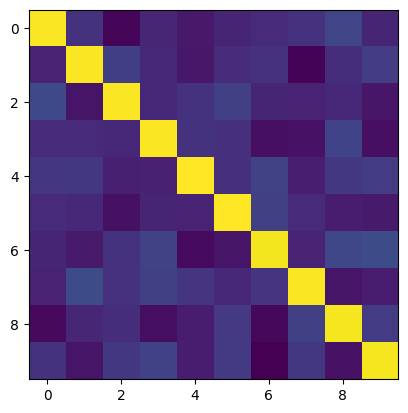

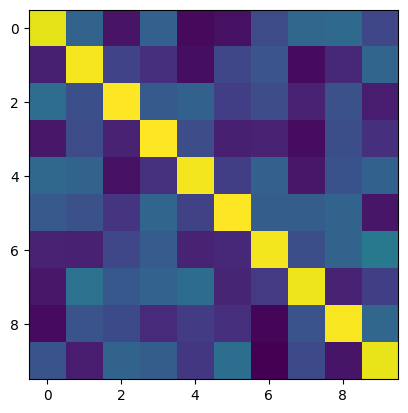

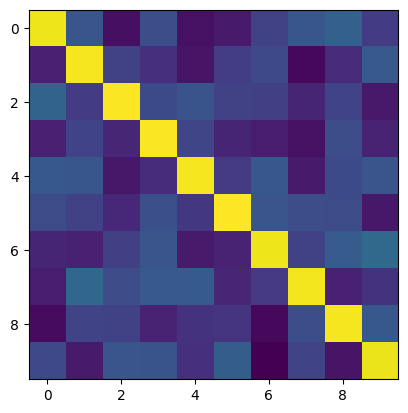

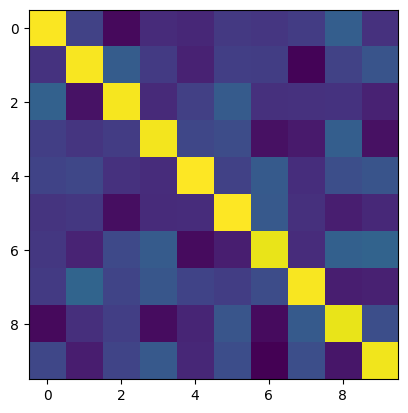

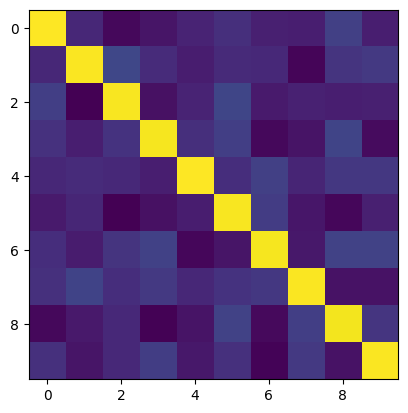

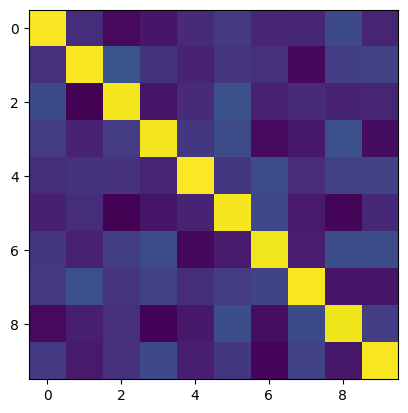

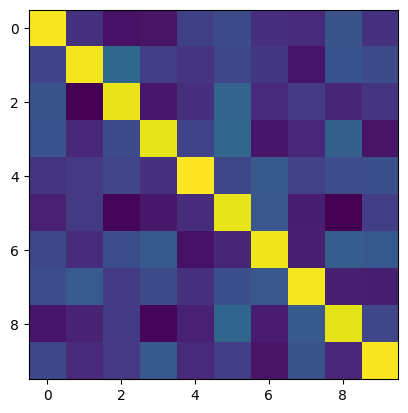

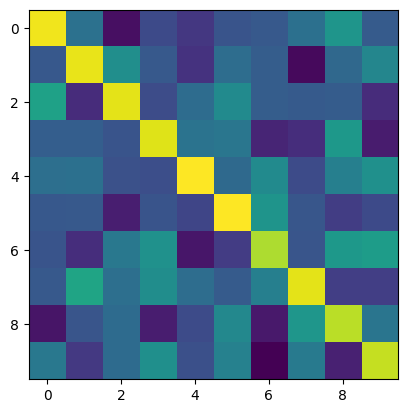

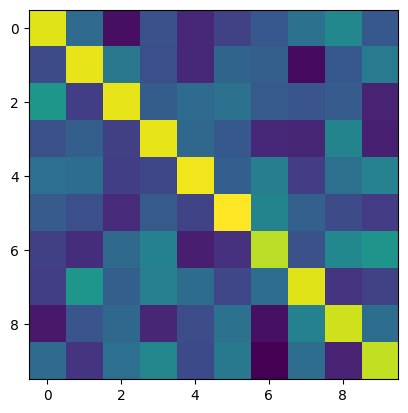

In [9]:
img_dir = "img"
if not os.path.exists(img_dir):
    os.mkdir(img_dir)
for t in range(1, 1000, 100):
    Y_t = Y[1, t, 0, :]
    plt.imshow(Y_t.detach().cpu().numpy())
    plt.savefig(os.path.join(img_dir, f"dev_{t}"))
    plt.show()

In [10]:
# check it is an orthogonal matrix
np.sum((Y_t @ Y_t.T - torch.eye(len(Y_t))).detach().numpy() ** 2)

1.5393702e-08